# <center>航班数据分析</center>

 ### 本章利用NetworkX库分析航班数据。在多个机场中寻找合适的机场作为货物的转运站

#  11.1  需求介绍
现有一组来源于网络的航空数据，是关于航线上各个城市间的航班基本信息，如某段旅程的起始点和目的地，还有一些表示每段旅程的到达和起飞时间。现假设有以下几个问题需要处理。  
（1）从A到B的最短途径是什么？分别从距离和时间角度考虑。  
（2）有没有办法从C到D？  
（3）哪些机场的交通最繁忙？  
（4）哪个机场位于大多数其他航线“之间”？以便成为其他航线的中转站。  
这里的ABCD分别表示某4个机场的名称。  


# 11.2 预备知识

## 1.图论简介

&ensp;&ensp;图论主要用于研究和模拟社交网络、欺诈模式、社交媒体的病毒性和影响力，社交网络分析(Social Network Analysis，SNA)可能是图论在数据科学中著名的应用，它也可用于聚类算法，特别是k-means(K均值聚类)，系统动力学也使用一些图论。  
为了后续进一步研究的方便，我们需要熟悉以下术语。  

&ensp;&ensp;顶点u和v称为边(u,v)的末端顶点。如果两条边具有相同的末端顶点，则它们是平行的。具有共同顶点的边是相邻的。结点v的度，写作d(v)，是指以v作为末端顶点的边数。  

&ensp;&ensp;平均路径长度是所有可能结点对应的最短路径长度的均值，给出了图的“紧密度”度量，可用于了解此网络中某些内容的流动速度。  

&ensp;&ensp;广度优先搜索和深度优先搜索是用于在图中搜索结点的两种不同算法。它们通常用于确定我们是否可以从给定结点到达某个结点，也称为图遍历。

&ensp;&ensp;中心性旨在寻找网络中最重要的结点。由于对重要性的不同理解，对中心性的度量标准也不-样。常用的中心性有以下3个。  

### (1)度中心性(Degree Centrality)

例如，我有 20个好友，那么意味着有 20个结点与我相连，如果你有50个好友,那么意味着你的点度中心度比我高，社交圈子比我广。这就是点度中心性的概念。

通过结点的度表示结点在图中的重要性，默认情况下会进行归一化，其值表达为结点度)以η-1(其中„-1就是归一化使用的常量)。由于可能存在循环，因此该值可能大于1。如果一个与其他许多点直接相连，就意味着该点具有较高的中心度，居于中心地位。一个结点的度越大，就意味着这个结点的度中心性越高，该结点在网络中就越重要。

### (2)紧密中心性(Closeness Centrality)。

例如，要建一个大型的娱乐商场(或者仓库的核心中转站),希望周围的顾客到达这个商场(中转站)的距离都尽可能短。这个就涉及紧密中心性或接近中心性的概念，接近中心性的值为路径k


接近中心性需要考量每个结点到其他结点的最短路径的平均长度。也就是说，对于一个结点而度的倒数。言，它距离其他结点越近，那么它的中心度越高。一般来说，那种需要让尽可能多的人使用的设施它的接近中心度是比较高的。


紧密中心度也叫结点距离中心系数。通过距离来表示结点在图中的重要性，一般是指结点到期他结点的平均路径的倒数。该值越大表示结点到其他结点的距离越近，即中心性越高。如果一个与网络中所有其他点的距离都很短，则称该点具有较高的整体中心度，又叫作接近中心度。对于个结点，它距离其他结点越近，那么它的接近中心性越大。

### (3)介数中心性(Betweenness Centrality)

类似于我们身边的社交达人，我们认识的不少朋友可能都是通过他/她认识的，这个人起到了中介的作用。介数中心性是指所有最短路径中经过该结点的路径数目占最短路径总数的比率。例如，经过点Y并且连接两点的短程线占这两点之间的短程线总数之比。计算图中结点的介数中心性分为两种情况:有权图上的介数中心性和无权图上的介数中心性。

两者的区别在于求最短路径时使用的方法不同，  
无权图采用 BFS(Breadth FirstSearch,广度优先搜索)求最短路径，  
有权图采用 Djkstr(迪杰斯特拉)算法求最短路径。  

在无向图中，该值为通过该结点的最短路径数除以(n-1)(n-2)/2;在有向图中，该值为通过该结点的最短路径数除以(n-1)(n-2)。介性中心度较高，说明其他点之间的最短路径很多，甚至全部都必须经过它中转。假如这个点消失了，那么其他点之间的交流会变得困难，甚至可能断开。

还有一个比较有用的概念，即图的密度(Densiy)。假设由A、B、C这3个用户组成的关注网络，其中唯一的边是A->B,那么这个网络是否紧密?我们可以这样思考,3个人之间最多可以有6条边，那么我们可以用1除以6来表示这个网络的紧密程度。如果6条边都存在，那么紧密程度是1;若6条边都不存在，则为0。这就是所谓图的密度。

## 2.networkx库与图的基本操作

Networkx可创建简单无向图、有向图和多重图（Multigraph），结点可为任意数据，支持任意的边值维度，功能丰富，简单易用。在上一章数据可视化中已经对其用法做了介绍。对于图有如下操作，先导入库。


In [1]:
import networkx as nx
import matplotlib.pyplot as plt

<pre>
（1）图的基本操作。
G = nx.Graph()         #建立一个空的无向图G
G.add_node(1)    #添加一个结点1，只能增加一个结点。结点可以用数字或字符表示
G.add_nodes_from([3,4,5,6])    #增加多个结点
G.add_edge(2,3)              #添加一条边2-3（隐含着添加了两个结点2、3）
G.add_edge(3,2)              #对于无向图，边3-2与边2-3被认为是一条边

G.nodes()                    #输出全部的结点
G.edges()                    #输出全部的边
G.number_of_edges()          #输出边的数量
len(G)                #返回G中结点数目
nx.degree(G)         #计算图的各个结点的度

nx.draw_networkx(G, with_labels=True) #画出带有刻度标尺及结点标签
nx.draw(G, with_labels=True)    #画出带有结点标签
pos=nx.spring_layout(G)  #生成结点位置  
nx.draw_networkx_nodes(G,pos,node_color='g',node_size=500,alpha=0.8) #画出结点
nx.draw_networkx_edges(G,pos,width=1.0,alpha=0.5,edge_color='b')  #把边画出来

labels={5:'5',1:'1',2:'2',3:'3',4:'4',6:'6'}
nx.draw_networkx_labels(G,pos,labels,font_size=16)  #把结点的标签画出来

edge_labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels)  #把边权重画出来
plt.savefig("wuxiangtu.png")     #保存图
有向图和无向图之间的转化。 
Graph.to_undirected()     #有向图和无向图互相转换
Graph.to_directed()       #无向图和有向图互相转换

G.add_weighted_edges_from([(3, 4, 3.5),(3, 5, 7.0)])  #加权图
G.get_edge_data(2, 3)          #获取2-3边的权

sub_graph = G.subgraph([1, 3,4])  #子图
（2）加权图。
有向图和无向图都可以给边赋予权重，用到的方法是add_weighted_edges_from，它接受1个或多个三元组[u,v,w]作为参数，其中u是起点，v是终点，w是权重，如下所示。
G.add_weighted_edges_from([(3, 4, 3.5),(3, 5, 7.0)]) #3到4的权重为3.5，3到7的权重为7.0
（3）图论经典算法。
<code>

计算1：求无向图的任意两点间的最短路径。

(1, {1: [1], 2: [1, 2], 3: [1, 3], 4: [1, 4], 5: [1, 5], 6: [1, 4, 6]})
(2, {2: [2], 1: [2, 1], 3: [2, 1, 3], 4: [2, 1, 4], 5: [2, 1, 5], 6: [2, 1, 4, 6]})
(3, {3: [3], 1: [3, 1], 2: [3, 1, 2], 4: [3, 1, 4], 5: [3, 1, 5], 6: [3, 1, 4, 6]})
(4, {4: [4], 1: [4, 1], 5: [4, 5], 6: [4, 6], 2: [4, 1, 2], 3: [4, 1, 3]})
(5, {5: [5], 1: [5, 1], 4: [5, 4], 6: [5, 6], 2: [5, 1, 2], 3: [5, 1, 3]})
(6, {6: [6], 4: [6, 4], 5: [6, 5], 1: [6, 4, 1], 2: [6, 4, 1, 2], 3: [6, 4, 1, 3]})


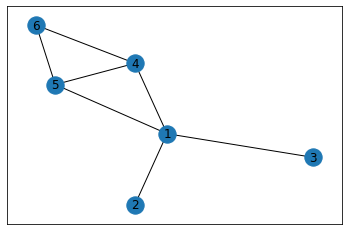

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

#求无向图的任意两点间的最短路径
G = nx.Graph()
G.add_edges_from([(1,2),(1,3),(1,4),(1,5),(4,5),(4,6),(5,6)])
path = nx.all_pairs_shortest_path(G)
for i in path:
     print(i)
nx.draw_networkx(G, with_labels=True) 

计算2：找图中两个点的最短路径。

No path


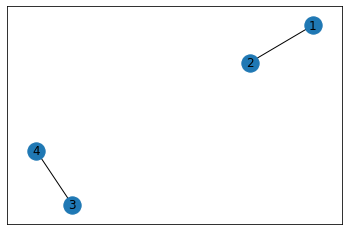

In [3]:
import networkx as nx
G=nx.Graph()
G.add_nodes_from([1,2,3,4])
G.add_edge(1,2)
G.add_edge(3,4)

nx.draw_networkx(G, with_labels=True) 
try:
     n=nx.shortest_path_length(G,1,4)
     print(n)
except nx.NetworkXNoPath:
     print('No path')

<pre>
（4）求最短路径和最短距离的函数。
NetworkX最短路径dijkstra_path和最短距离dijkstra_path_length。
nx.dijkstra_path(G, source, target, weight='weight')        #求最短路径
nx.dijkstra_path_length(G, source, target, weight='weight')  #求最短距离

nx.degree_centrality(G)            #结点度中心系数
nx.closeness_centrality(G)          #紧密中心性
nx.betweenness_centrality(G)       #介数中心系数

nx.transitivity(G)   #图或网络的传递性，即图或网络中，认识同一个结点的两个结点也可能认识双方，计算公式为：3×三角形的个数/三元组个数（该三元组个数是有公共顶点的边对数）

nx.clustering(G)   #图或网络中结点的聚类系数。计算公式为：((d(u)(d(u)-1)/2)
<code>

# 11.3航班数据处理
我们先来对航班数据（Airline.csv）进行了解。打开数据表前4行数据,如下所示。 
 


<img src="image/Chapter11_1.png" >

从图上面数据可以看出，数据共有16列，为了方便对数据的理解，我们将数据的列名对应关系给出，如下所示。

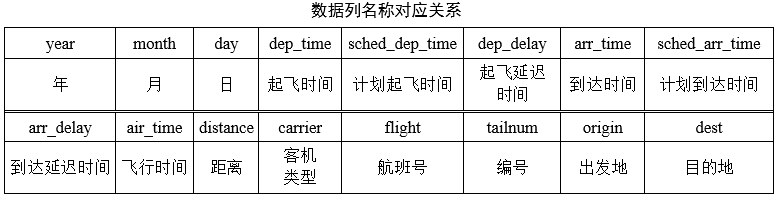

<pre>
year	month	day	dep_time	sched_dep_time	dep_delay	arr_time	sched_arr_time
年	月		日	起飞时间	计划起飞时间	起飞延迟时间	到达时间	计划到达时间

arr_delay	air_time	distance	carrier	flight	tailnum	origin	dest
到达延迟时间	飞行时间	距离	客机类型	航班号	编号	出发地	目的地
<code>

## 1.导入数据

In [1]:
import pandas as pd 
import numpy as np

data = pd.read_csv(r'file/Airlines.csv', engine='python') #参数engine='python'是为了防止中文路径出错
data

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2013,11,29,1129.0,1135,-6.0,1414.0,1436,-22.0,DL,1875,N342NB,LGA,TPA,147.0,1010
96,2013,3,10,1029.0,1029,0.0,1300.0,1344,-44.0,UA,1605,N37465,EWR,LAX,308.0,2454
97,2013,11,25,1724.0,1725,-1.0,1828.0,1845,-17.0,AA,256,N3CTAA,JFK,BOS,40.0,187
98,2013,3,5,930.0,929,1.0,1421.0,1426,-5.0,B6,215,N638JB,EWR,SJU,200.0,1608


In [4]:
data.shape

(100, 16)

In [2]:
data.dtypes

year                int64
month               int64
day                 int64
dep_time          float64
sched_dep_time      int64
dep_delay         float64
arr_time          float64
sched_arr_time      int64
arr_delay         float64
carrier            object
flight              int64
tailnum            object
origin             object
dest               object
air_time          float64
distance            int64
dtype: object

In [3]:
data.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807.0,1630,97.0,1956.0,1837,79.0,EV,4411,N13566,EWR,MEM,144.0,946
1,2013,8,17,1459.0,1445,14.0,1801.0,1747,14.0,B6,1171,N661JB,LGA,FLL,147.0,1076
2,2013,2,13,1812.0,1815,-3.0,2055.0,2125,-30.0,AS,7,N403AS,EWR,SEA,315.0,2402
3,2013,4,11,2122.0,2115,7.0,2339.0,2353,-14.0,B6,97,N656JB,JFK,DEN,221.0,1626
4,2013,8,5,1832.0,1835,-3.0,2145.0,2155,-10.0,AA,269,N3EYAA,JFK,SEA,358.0,2422


##  2.处理时间数据格式
预计离港时间格式不标准，将时间格式转化为标准格式std。


In [ ]:
data['sched_dep_time'].head()

In [ ]:
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
data['std'].head()

<pre>
replace()方法将sched_dep_time字段从末尾取两个数字用空去替代，也就是删除末尾的两个数字。

S.replace(old,new[,count=S.count(old)])
●  old：指定的旧子字符串。
●  new：指定的新子字符串。
●  count：可选参数，替换的次数，默认为指定的旧子字符串在字符串中出现的总次数。
返回值：返回把字符串中指定的旧子字符串替换成指定的新子字符串后生成的新字符串，如果指定count可选参数则替换指定的次数，默认为指定的旧子字符串在字符串中出现的总次数。
\d{2}$：其中\d表示匹配数字0～9，{2}表示将前面的操作重复2次，$表示从末尾开始匹配。

Series.str.extract(pat, flags=0, expand=None)可用正则表达式从字符数据中抽取匹配的数据，只返回第一个匹配的数据。
●  pat：字符串或正则表达式。
●  flags：整型。
●  expand：布尔型，是否返回DataFrame。
返回值：数据框dataframe/索引index。

<code>

In [ ]:
 #将计划到达时间sched_arr_time转化为标准格式sta
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

#将实际离港时间dep_time转化为标准格式atd
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

#将实际到达时间arr_time转化为标准格式ata
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

#将年月日时间合并为一列date
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

# 删除不需要的year、month、day
data = data.drop(['year', 'month', 'day'],axis = 1)#drop函数默认删除行，删除列需要加axis = 1
data.head(15)

## 3.检查数据空缺值
检查数据有没有0值或空值。


In [ ]:
np.where(data == 0) #从得出的空行数据中查看第29行数据data.iloc[29]

In [ ]:
np.where(pd.isnull(data))   #发现了nan数据

发现了0和空值，该怎么处置？一般使用删除或者填充。当数据够大时，在删除不影响整体或者影响很小的数据时，可以采用删除的方法，当数据不够多时，或者删除数据对计算、预测原数据集有影响时，建议采用均值法填充、0值填充、按前值或后值填充等方法。


## 4.构建图，并载入数据


In [ ]:
import networkx as nx
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)
FG.nodes()

In [ ]:
FG.edges()

In [ ]:
import networkx as nx
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)
FG.nodes()

In [ ]:
FG.edges()

## 5.找出最繁忙的机场


In [ ]:
nx.draw_networkx(FG, with_labels=True) # 绘图，我们看到3个繁忙的机场
dd = nx.algorithms.degree_centrality(FG) # 结点度中心系数
max(dd, key=lambda x:dd[x])#或者直接用字典方法max(dd,key=dd.get),但不能显示并列值


#### 注意：图中结点度中心系数最大的并非只有EWR机场，LGA机场同样跟EWR机场有相等的值，所以我们需要自定义一个函数来查看最大值，这里仅判断前三项是否并列，并抛出最大值。


In [ ]:
def top(dd): 
     '''
     通过结点度中心系数来求其最大值
     此处仅判断前三项是否并列
     '''
    dd_id = list(dd.items())
    dd_id_0=[]
    for i in dd_id:
        i= list(i)
        i[0],i[1]=i[1],i[0]
        dd_id_0.append([i[0],i[1]])
    sor_dd = sorted(dd_id_0,reverse=True)
    if sor_dd[0][0]== sor_dd[1][0]:
        if sor_dd[1][0]== sor_dd[2][0]:
            print(sor_dd[0:3])
        else:
            print(sor_dd[0:2])
    else:
        print(sor_dd[0])
 
 top(dd)

所以EWR机场和LGA机场是所有机场中最繁忙的两个机场。

## 6.找出某两个机场间的最短路径和最省时

找出JAX机场和DFW机场间的最短路径。


In [ ]:
all_path = nx.all_simple_paths(FG, source='JAX', target='DFW')#从JAX到DFW的所有路径

In [ ]:
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

In [ ]:
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

### 适合做中转的机场


In [ ]:
cc = nx.closeness_centrality(FG) 
top(cc)

In [ ]:
bc = nx.betweenness_centrality(FG)
top(bc)

适合做中转的机场不仅需要有较大的度，还要具有紧密性和介数中心性，通过这两项可以看出，最适合作为中转机场的是EWR机场。


# 11.4 完整代码


[[0.5714285714285714, 'LGA'], [0.5714285714285714, 'EWR']]
['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX

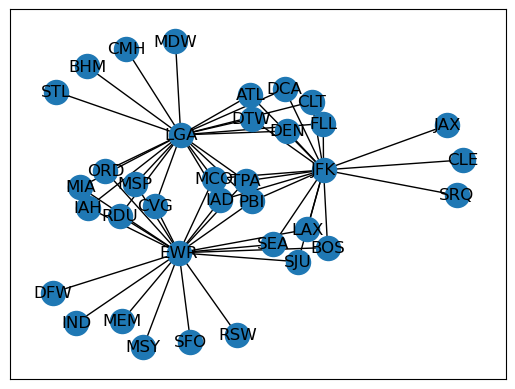

In [1]:

import pandas as pd 
import numpy as np

#【导入数据】
data = pd.read_csv(r'file/Airlines.csv',engine='python')  
#参数engine='python'是为了防止中文路径出错
data.shape
data.dtypes
data.head()

#【处理时间数据格式】
#将时间格式转化成正常格式
data['sched_dep_time'].head()
#预计离港时间格式不标准，将它转化为标准格式std
#replace()将sched_dep_time字段从末尾取两个数字用空去替代，也就是删除末尾的两个数字
#extract(pat,expand=False) 用正则从字符中抽取匹配的数据，只返回第一个匹配的数据
data['std'] = data.sched_dep_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_dep_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'
data['std'].head()

#将计划到达时间sched_arr_time转化为标准格式sta
data['sta'] = data.sched_arr_time.astype(str).str.replace('(\d{2}$)', '') + ':' + data.sched_arr_time.astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

#将实际离港时间dep_time转化为标准格式atd
data['atd'] = data.dep_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.dep_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

#将实际到达时间arr_time转化为标准格式ata
data['ata'] = data.arr_time.fillna(0).astype(np.int64).astype(str).str.replace('(\d{2}$)', '') + ':' + data.arr_time.fillna(0).astype(np.int64).astype(str).str.extract('(\d{2}$)', expand=False) + ':00'

#将年月日时间合并为一列date
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])

#删除不需要的year、month、day
data = data.drop(['year', 'month', 'day'],axis = 1)#drop函数默认删除行，列需要加axis = 1
data.head(15)

#【检查数据空缺值】
#检查数据有没有0值或者空值
np.where(data == 0) #从得出的空行数据中查看第29行数据data.iloc[29]
#np.where(np.isnan(data))#有时会报错，报错就用pd.isnull(data)
np.where(pd.isnull(data))#发现了nan数据

#【构建图，并载入数据】
#使用networkx函数导入数据集
import networkx as nx
FG = nx.from_pandas_edgelist(data, source='origin', target='dest', edge_attr=True,)
FG.nodes()
FG.edges()

#【找出最繁忙的机场】
nx.draw_networkx(FG, with_labels=True) # 绘图。正如预期的一样，我们看到3个繁忙的机场
dd = nx.algorithms.degree_centrality(FG) # 结点度中心系数。通过结点的度表示结点在图中的重要性
#dd = nx.degree_centrality(FG)
max(dd, key=lambda x:dd[x])#或者直接用字典方法max(dd,key=dd.get)，但是不能显示并列第一

#下面定义函数的方式输出最大值
def top(dd): 
     '''
     通过结点度中心系数来求其最大值
     此处仅判断前三项是否并列
     '''
     dd_id = list(dd.items())
     dd_id_0=[]
     for i in dd_id:
          i= list(i)
          i[0],i[1]=i[1],i[0]
          dd_id_0.append([i[0],i[1]])
     sor_dd = sorted(dd_id_0,reverse=True)
     if sor_dd[0][0]== sor_dd[1][0]:
          if sor_dd[1][0]== sor_dd[2][0]:
              print(sor_dd[0:3])
          else:
              print(sor_dd[0:2])
     else:
          print(sor_dd[0])
        
top(dd)

nx.density(FG) #图的平均边密度
nx.average_shortest_path_length(FG) #最短路径的平均长度
nx.average_degree_connectivity(FG) #均值连接的度（平均连接度）
nx.degree(FG)#每个结点的度

#找出某两个机场之间的所有路径
all_path = nx.all_simple_paths(FG, source='JAX', target='DFW')
for path in all_path:
     print(path)
    
#找出最短路径（Dijkstra最短路径算法）
dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath  
    
#找出最省时的路径
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

#适合做中转的机场
cc = nx.closeness_centrality(FG) 
top(cc)

bc = nx.betweenness_centrality(FG)
top(bc)